In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from API_Keys import Weather_API_Key
from citipy import citipy

In [2]:
output_data_file = "Output_Files/Cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

610

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + Weather_API_Key 

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
        
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = url + "&q=" + city
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count += 1

    try:
        city_weather = requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass
              
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mantua
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | tocopilla
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | henties bay
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | lasa
Processing Record 13 of Set 1 | pimenteiras
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | trairi
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | salt
Processing Record 19 of Set 1 | necochea
Processing Record 20 of Set 1 | raudeberg
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | kodiak
Processing Record 23 of Set

In [5]:
city_data_pd = pd.DataFrame(city_data)

lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

city_data_pd.to_csv(output_data_file, index_label="City_ID")

city_data_pd.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [6]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mantua,45.17,10.78,84.99,48,79,3.00,IT,1590244146
1,mataura,-46.19,168.86,46.02,89,100,2.62,NZ,1590244146
2,tocopilla,-22.09,-70.20,70.02,42,5,1.92,CL,1590244146
3,qaanaaq,77.48,-69.36,31.37,90,0,3.18,GL,1590244146
4,bilibino,68.05,166.44,26.24,92,82,2.33,RU,1590244147


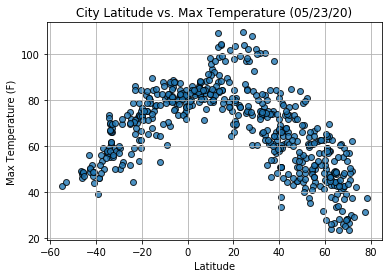

In [8]:
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_Files/Fig1.png")

plt.show()

In [9]:
#The above scatter plot shows how Latitude affects a City's max temperature.  
#Max temperature across these global cities is maxed out at Latitude's between 0-20, and progressivelly gets lower as the Latitude gets larger and smaller from there (following a normal distribution).

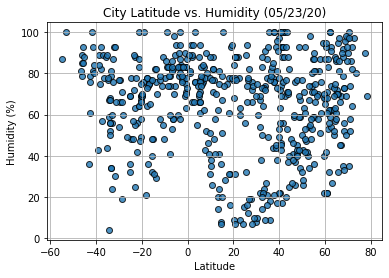

In [13]:
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_Files/Fig2.png")

plt.show()

In [14]:
#The scatter plot below is graphin a City's Latitude vs the City's Humidity.
#There is no real inferrence that can be made between Latitude and Humidity.

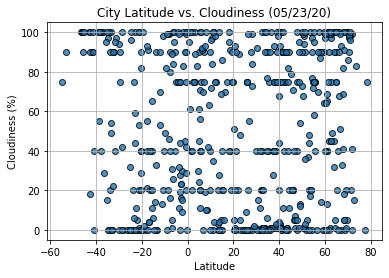

In [15]:
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_Files/Fig3.png")

plt.show()

In [16]:
#The scatter plot above is graphing out the relationship between a City's Latitude and Cloudiness.
#There doesn't seem to be much of a correlation between the two variables.

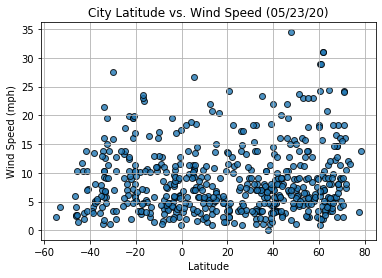

In [17]:
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_Files/Fig4.png")

plt.show()

In [18]:
#The above graph is showing the relationship between a City's Latitude and a City's Wind Speed.
#There is also no correlation between these data points other than what seems to be a small positive correlation between a high Latitude and increased Wind Speed.

In [20]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [21]:
northern_hemisphere_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemisphere_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

The r-squared is: -0.8016871627904095


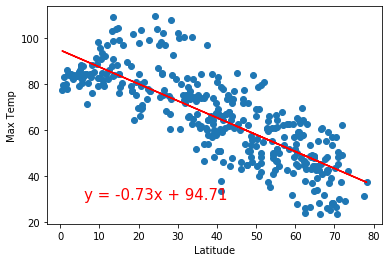

In [22]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

In [24]:
#This scatter plot is similar to the one showed previously in that it shows the relationship between Latitude and Max Temp across different Cities.
#However, this scatter plot only looks at Cities in the Northern Hemisphere.
#Within the Northern Hemisphere as the Latitude gets higher and higher, maximum Temperature gets lower and lower, with a substantial negative correlation (-0.73).

The r-squared is: 0.8221862865099063


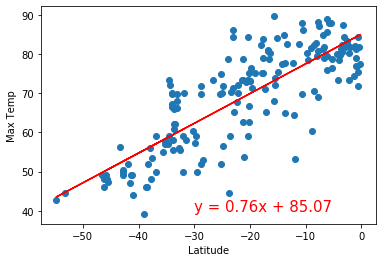

In [25]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

In [26]:
#Similar as the one above except that it looks at the relationship between Latitude and Max Temp in the Southern Hemisphere.
#Within the Southern Hemisphere you have a similarly sized, but positve correlation between the two variables, as latitude increases so does Max Temp.

The r-squared is: 0.0771971103314113


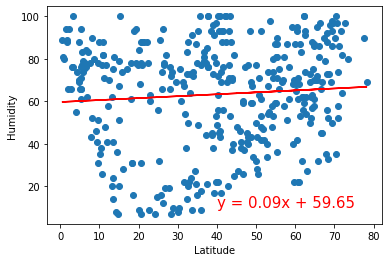

In [27]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

In [28]:
#Similar as a the Latitude vs Humidity scatter plot created before.
#Shows that there isn't much of a correlation between Latitude and Humidity.

The r-squared is: 0.08396531270253066


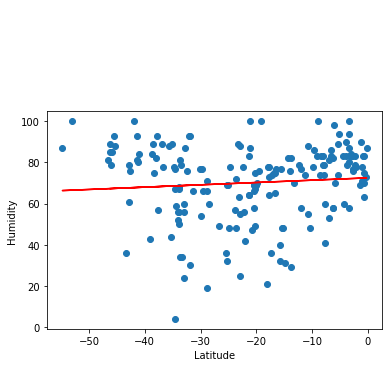

In [30]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

In [31]:
#Similar as a the Latitude vs Humidity scatter plot created before.
#Shows that there isn't much of a correlation between Latitude and Humidity.

The r-squared is: 0.10062272576105159


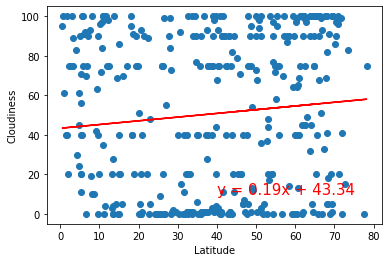

In [32]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

In [33]:
#Similar as a the Latitude vs Cloudiness scatter plot created before.
#Shows that there isn't much of a correlation between Latitude and Cloudiness.
#But there is a small positive correlation within the Northern Hemisphere.

The r-squared is: -0.13367212063384284


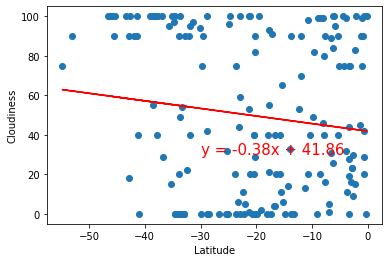

In [34]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

In [35]:
#Similar as a the Latitude vs Cloudiness scatter plot created before.
#Shows that there isn't much of a correlation between Latitude and Cloudiness.
#But there is a small negative correlation within the Southern Hemisphere.

The r-squared is: 0.12965261852890547


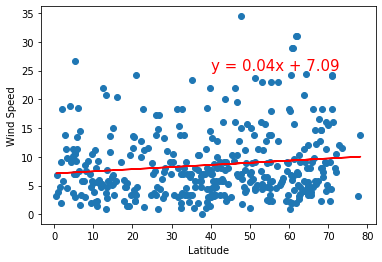

In [36]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

In [37]:
#Similar as a the Latitude vs Wind Speed scatter plot created before.
#Shows that there isn't much of a correlation between Latitude and Wind Speed.

The r-squared is: 0.012310280626081051


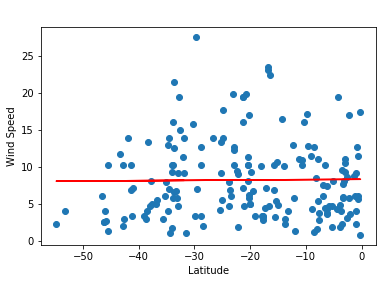

In [38]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))

In [39]:
#Similar as a the Latitude vs Wind Speed scatter plot created before.
#Shows that there isn't much of a correlation between Latitude and Wind Speed.